In [1]:
print("hello world")

hello world


In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [10]:
train_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

In [11]:
img_classes = os.listdir(train_path)
print(img_classes)

['Normal', 'Viral Pneumonia', 'Covid']


In [12]:
len(img_classes)

3

In [13]:
def plot_frist_image_from_each_class(path):
    
    img_classes = os.listdir(path)
    plt.figure(figsize = (13,13))
    for i , cat in enumerate(img_classes):
        image_path = path + '/' + img_classes[0]
        images_in_folder = os.listdir(image_path)
        
        first_img = images_in_folder[0]
        first_img_path = image_path + '/' + first_img

        img=image.load_img(first_img_path)
        img_array=image.img_to_array(img)/255


        plt.subplot(1,len(img_classes),i+1)
        plt.imshow(img_array)
        plt.title(img_classes[i])
        plt.axis('off')
    plt.show()

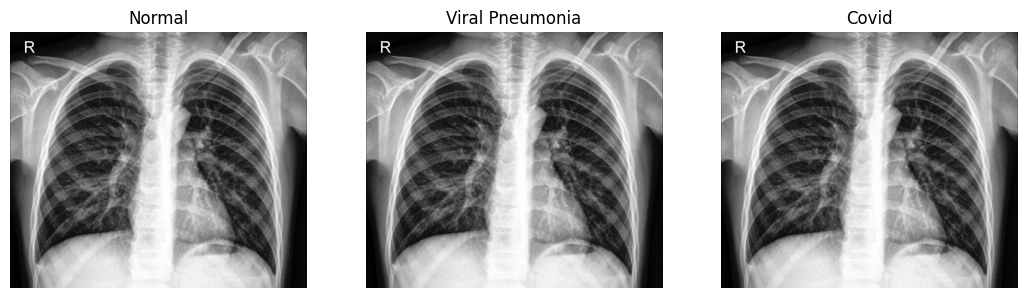

In [14]:
plot_frist_image_from_each_class(train_path)

In [15]:
#Data Augmentation
train_gen=ImageDataGenerator(rescale=1/255,
                            rotation_range=20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            #fill_mode = 'nearst'
                             validation_split=0.2
                            )

In [16]:
test_gen=ImageDataGenerator(rescale=1/255,
                            validation_split=0.2
                           )

In [17]:
train_data =train_gen.flow_from_directory(train_path,
                                         target_size=(250,250),
                                         batch_size=10,
                                         class_mode='categorical',
                                         subset='training'
                                         )

Found 201 images belonging to 3 classes.


In [18]:
test_data =test_gen.flow_from_directory(train_path,
                                         target_size=(250,250),
                                         batch_size=1,
                                         class_mode='categorical',
                                         subset='validation'
                                       )

Found 50 images belonging to 3 classes.


In [19]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(250,250,3),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())


model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))

model.add(Dense(3,activation='softmax'))

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 250, 250, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 125, 125, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 31, 31, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       7,373,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,812,035 (29.80 MB)

 Trainable params: 7,812,035 (29.80 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
             metrics=['accuracy'])

In [22]:
num_ep = 47

In [23]:


model_history=model.fit(train_data,epochs=num_ep,validation_data = test_data)

Epoch 1/47
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 543ms/step - accuracy: 0.5133 - loss: 1.1761 - val_accuracy: 0.6600 - val_loss: 0.9475
Epoch 2/47
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step - accuracy: 0.4402 - loss: 1.0062 - val_accuracy: 0.7800 - val_loss: 0.5504
Epoch 3/47
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.5206 - loss: 0.9215 - val_accuracy: 0.7600 - val_loss: 0.6770
Epoch 4/47
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 254ms/step - accuracy: 0.6963 - loss: 0.6481 - val_accuracy: 0.8400 - val_loss: 0.6646
Epoch 5/47
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.7140 - loss: 0.6494 - val_accuracy: 0.7800 - val_loss: 0.6112
Epoch 6/47
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 265ms/step - accuracy: 0.6754 - loss: 0.5932 - val_accuracy: 0.8000 - val_loss: 0.5755
Epoch 7/47
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - accuracy: 0.7705 - loss: 0.5777 - val_accuracy: 0.8800 - val_loss: 0.5261
Epoch 8/47
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 0.7952 - loss: 0.4774 - val_accuracy: 0

In [29]:
from tensorflow.keras.models import save_model,load_model

In [24]:
model.save('/kaggle/working/Covid_19.h5')


In [33]:
save_model(model,'/kaggle/working/Covid_19_downloadable.h5')